# SIH Training Program

In [1]:
import pandas as pd

In [3]:
iris = pd.read_csv('iris.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns
sns.set(style='white',color_codes=True)

## Scatter plot

/home/baleshwar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


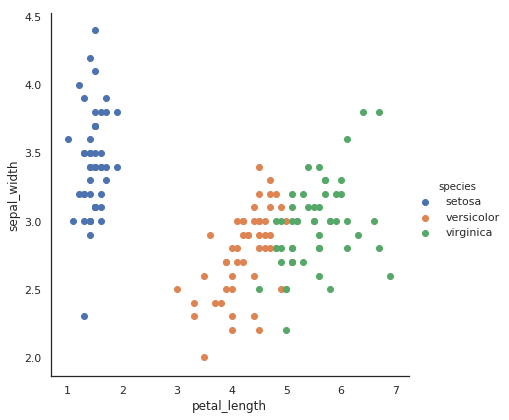

In [9]:
sns.FacetGrid(iris,hue='species',size = 6).map(plt.scatter,'petal_length','sepal_width').add_legend()

# Logistic Regression

### Converting categorical variables into numbers

In [ ]:
# One of the jobs in data preprocessing task is to convert English words into numbers

In [10]:
flower_mapping = {'setosa':0,'versicolor':1,'virginica':2}
iris['species']  = iris['species'].map(flower_mappingping)

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preparing input and output

In [12]:
x = iris[['sepal_length','sepal_width','petal_length','petal_width']].values
y = iris[['species']].values

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x,y.ravel())

/home/baleshwar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baleshwar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Accuracy

In [16]:
model.score(x,y)

0.96

## Make predictions

In [21]:
expected = y
predicted = model.predict(x)

### Summarize the fit of the model

In [23]:
from sklearn import metrics

In [25]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [26]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


## Regularization

In [36]:
# Regularization is  nothing but controlling over fitting

In [39]:
model = LogisticRegression(C = 100,penalty='l2')

In [33]:
y.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
model.fit(x,y.flatten())

/home/baleshwar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
model.score(x,y)

0.98

# Naive Bayes Classifier

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [42]:
dataset = datasets.load_iris()

In [43]:
model = GaussianNB()
model.fit(dataset.data,dataset.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
model.score(dataset.data,dataset.target)

0.96

# Decision Tree Classifier

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Apply on Iris Datasets

In [47]:
dataset = datasets.load_iris()

In [48]:
model  = DecisionTreeClassifier()
# model = DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=3)
model.fit(dataset.data,dataset.target)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [49]:
model.score(dataset.data,dataset.target)

0.9733333333333334

## Random Forest Classifier